In [1]:
from experiment import Experiment

fox_pcts = list(np.arange(0, 101, 6.25))
print(fox_pcts)
ex = Experiment(10, fox_pcts, tau=0.5)
ex.load_texts('Three Months for Semantic Network Experiments')

[0.0, 6.25, 12.5, 18.75, 25.0, 31.25, 37.5, 43.75, 50.0, 56.25, 62.5, 68.75, 75.0, 81.25, 87.5, 93.75, 100.0]


In [3]:
ex.run()

Running 100% MSNBC
Running mix of 6.25% Fox News
6.25% mix trial # 1 of 10
replacing 92 of 1476 MSNBC shows with Fox News shows
6.25% mix trial # 2 of 10
replacing 92 of 1476 MSNBC shows with Fox News shows
6.25% mix trial # 3 of 10
replacing 92 of 1476 MSNBC shows with Fox News shows
6.25% mix trial # 4 of 10
replacing 92 of 1476 MSNBC shows with Fox News shows
6.25% mix trial # 5 of 10
replacing 92 of 1476 MSNBC shows with Fox News shows
6.25% mix trial # 6 of 10
replacing 92 of 1476 MSNBC shows with Fox News shows
6.25% mix trial # 7 of 10
replacing 92 of 1476 MSNBC shows with Fox News shows
6.25% mix trial # 8 of 10
replacing 92 of 1476 MSNBC shows with Fox News shows
6.25% mix trial # 9 of 10
replacing 92 of 1476 MSNBC shows with Fox News shows
6.25% mix trial # 10 of 10
replacing 92 of 1476 MSNBC shows with Fox News shows
Running mix of 12.5% Fox News
12.5% mix trial # 1 of 10
replacing 184 of 1476 MSNBC shows with Fox News shows
12.5% mix trial # 2 of 10
replacing 184 of 1476 MS

In [4]:
results = {
    pct: v.fit_coefficients.slope for pct, v in ex.run_dict.items()
}


In [5]:
print(results)

{0.0: -2.6295091834095934, 75.0: -2.6088069143726722, 68.75: -2.6067770902230216, 37.5: -2.647757285686787, 6.25: -2.6620930470395101, 43.75: -2.6356837102962771, 12.5: -2.6135583473227997, 18.75: -2.6699979408888752, 81.25: -2.5955236556105299, 50.0: -2.6485254905612097, 25.0: -2.6559814799327919, 87.5: -2.6012446927757424, 56.25: -2.6487890143792145, 100.0: -2.5057285094239878, 93.75: -2.5779154826198658, 62.5: -2.6423485293468754, 31.25: -2.6406554768677384}


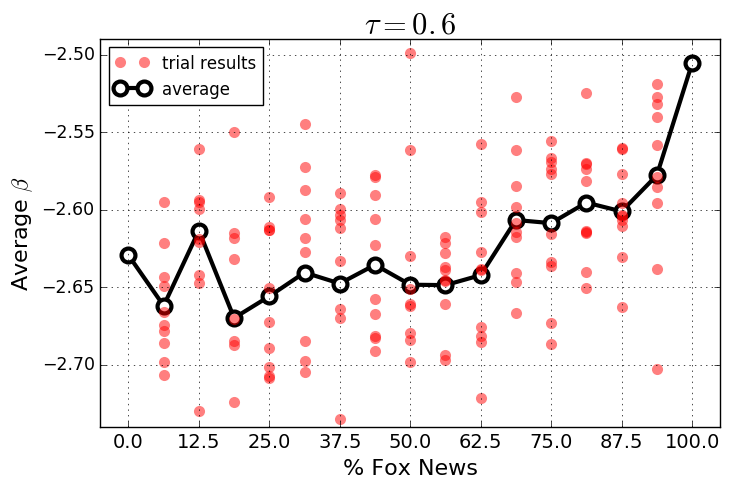

In [118]:
result_items = list(results.items())
    
result_items.sort(key=lambda x: x[0])

x = [a[0] for a in result_items]
y = [a[1] for a in result_items]

tfcs = [tfc for tfc in [rde.test_fit_coefficients for rde in ex.run_dict.values()] if tfc is not None]
yerr = [0] + [np.std([fc.slope for fc in el]) for el in l] + [0]



fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
plt.grid()
#plt.errorbar(x, y, yerr=yerr, color='black', fmt='o-', mec='black', mfc='white', ecolor='blue', 
#             elinewidth=1, ms=6, mew=3, lw=3, label='Average $\\beta$ with st. dev.')
plt.plot(x, y, 'o-', mec='black', mfc='white', ms=10, mew=3, 
         lw=3, color='black', label='average')

# build plot of componenet beta test results
sample_results = {
    pct: [tfc.slope for tfc in v.test_fit_coefficients] for pct, v in ex.run_dict.items() if v.test_fit_coefficients is not None
}
z = list(sample_results.items())
x_trial = [a[0] for a in z]
beta_trial = [a[1] for a in z]
plt.plot(x_trial, beta_trial, 'o', mew=0, ms=8, alpha=.5, color='red', label='trial results')


plt.ylabel('Average $\\beta$', size=16)
plt.xlabel('% Fox News', size=16)

plt.xlim([-5, 105])
plt.ylim([-2.74, -2.49])
ax.set_xticks(np.arange(0, 101, 12.5))
ax.tick_params(axis='x', which='major', labelsize=14)
ax.tick_params(axis='y', which='major', labelsize=12.5)
handles,labels=ax.get_legend_handles_labels()

plt.title('$\\tau = 0.6$', size=22)
plt.legend([handles[-1], handles[0]], [labels[-1], labels[0]], loc='best')
plt.show()

In [17]:
l = [tfc for tfc in [rde.test_fit_coefficients for rde in ex.run_dict.values()] if tfc is not None]

In [29]:
[0] + [np.std([fc.slope for fc in el]) for el in l] + [0]

[0,
 0.044617871770516029,
 0.039229780322914236,
 0.057045511349916048,
 0.032990677183150081,
 0.043165433349486922,
 0.051940871549743625,
 0.068866939631854251,
 0.036193305755185708,
 0.064072757474852221,
 0.029455777020080072,
 0.026271472097063691,
 0.043286941219626604,
 0.054432618728363399,
 0.047018444337710533,
 0.065189480672620606,
 0]

In [93]:
sample_results = {
    pct: [tfc.slope for tfc in v.test_fit_coefficients] for pct, v in ex.run_dict.items() if v.test_fit_coefficients is not None
}
print(sample_results)

{43.75: [-2.6915782343980781, -2.657784999759472, -2.5789637190128816, -2.6829579426237786, -2.6816408183192308, -2.5904787712597717, -2.6227131141950659, -2.6671586763639441, -2.5776662360887794, -2.605894590941765], 68.75: [-2.5851427492662133, -2.6179557994819986, -2.5615781024838231, -2.6408802918395824, -2.6089712005288122, -2.6466727571821487, -2.6664583287171428, -2.6144080380142367, -2.5983155480721885, -2.5273880866440712], 37.5: [-2.6035129661280672, -2.6330445030454586, -2.7351165109175555, -2.606874941427948, -2.7632417802224114, -2.6703159234615566, -2.6639823283484043, -2.5895925519021534, -2.6121306260005075, -2.5997607254138044], 6.25: [-2.6981741467018132, -2.7066782733865327, -2.621897473590856, -2.6860602999149874, -2.5953159427318235, -2.6661274715792729, -2.6494966380548122, -2.6785769811507669, -2.6748356867544709, -2.6437675565297676], 75.0: [-2.5769495486814895, -2.5559508806838847, -2.6865044517686019, -2.6362668058150747, -2.5695518118272864, -2.63362616071457

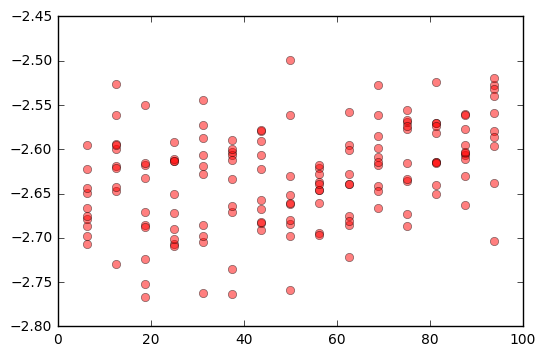

In [94]:
z = list(sample_results.items())

x = [a[0] for a in z]
y = [a[1] for a in z]

plt.plot(x, y, 'o', color='red', alpha=.5)
plt.show()

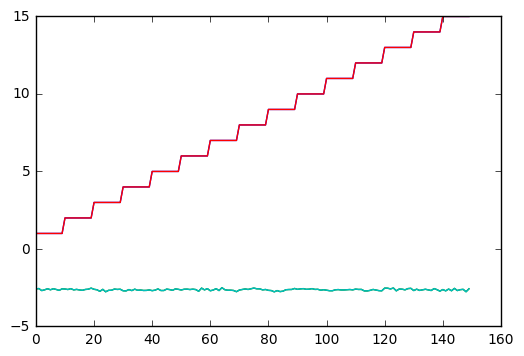

In [77]:
plt.plot(xy)
plt.show()